In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [5]:
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')                      
# Fashion dataset is provided by mnist and this fashion dataset is converted into CSV file and mnist dataset is not converted into CSV file.
# Fashion dataset two part - 1.train dataset 2. test dataset 

In [6]:
fashion_train.shape

(60000, 785)

In [7]:
x_train_fashion = fashion_train.drop('label',axis=1)
y_train_fashion = fashion_train['label']
x_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test['label']
# In train removing output[label] in column wise[axis=1]

In [8]:
x_train_fashion

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train_fashion.shape

(60000, 784)

In [10]:
y_train_fashion

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [11]:
y_train_fashion.shape

(60000,)

In [12]:
x_train_re=x_train_fashion.values.reshape(-1,28,28)
x_test_re=x_test_fashion.values.reshape(-1,28,28)

In [13]:
x_train_re.shape

(60000, 28, 28)

In [14]:
col=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Bag','Ankleboot']

In [15]:
print(len(col))

9


In [16]:
print(len(y_train_fashion))

60000


In [17]:
print(x_train_fashion.shape)

(60000, 784)


IndexError: list index out of range

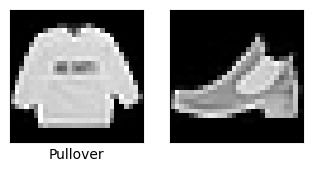

In [18]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_fashion.values[i].reshape(28,28),cmap='gray')
    plt.xlabel(col[y_train_fashion[i]])
ptl.show()